# 数据挖掘作业1
## 姓名：胡宗晖 学号：3220220922
### 数据集：Alzheimer Disease and Healthy Aging Data In US

In [1]:
#导入必要的包
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from collections import Counter
from math import isnan
import math
import os

## 查看数据集并对数据集进行了解

In [2]:
#读取数据集
path = 'D:/mywork/data/'
data = pd.read_csv(path+'Alzheimer Disease and Healthy Aging Data In US.csv',index_col=False ,low_memory=False)
data.head()#默认展示前五行数据

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL
2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL
3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,NaN,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL
4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE


In [3]:
# 数据集的含义
# 列名------------------------含义
# YearStart                   数据收集开始的年份（标称）
# YearEnd                     数据收集结束的年份（标称）
# LocationAbbr                数据收集位置的缩写（标称）
# LocationDesc                数据收集位置的全名（标称）
# Datasource                  数据来源（标称）
# Class                       数据的类（标称）
# Topic                       数据的主题（标称）
# Question                    与数据相关的问题（标称）
# Data_Value_Unit             数据值测量的单位（标称）
# DataValueTypeID             数据值类型ID（标称）
# Data_Value_Type             数据值的类型（例如平均值、百分比）（标称）
# Data_Value                  实际数据值（数值）
# Data_Value_Alt              一个替代数据值（数值）
# Low_Confidence_Limit        数据值置信区间的下限（数值）
# High_Confidence_Limit       数据值置信区间的上限（数值）
# Sample_Size                 用于收集数据的样本的大小
# StratificationCategory1     用于分层的第一个类别（例如年龄组）（标称）
# Stratification1             使用的特定分层（例如18-24岁）（标称）
# StratificationCategory2     用于分层的第二类（标称）
# Stratification2             用于第二类的具体分层（标称）
# Geolocation                 收集数据的位置的经纬度（数值）
# ClassID                     数据类的ID（标称）
# TopicID                     数据主题的ID（标称）
# QuestionID                  与数据相关的问题的ID（标称）
# LocationID                  收集数据的位置的ID（标称）
# StratificationCategoryID1   用于分层的第一个类别的ID（标称）
# StratificationID1           用于第一类的特定分层的ID（标称）
# StratificationCategoryID2   用于分层的第二个类别的ID（标称）
# StratificationID2           用于第二类的特定分成的ID（标称）

In [4]:
data["Low_Confidence_Limit"] = pd.to_numeric(data["Low_Confidence_Limit"],errors='coerce')
data["High_Confidence_Limit"] = pd.to_numeric(data["High_Confidence_Limit"],errors='coerce')
data.dtypes #每列数据的数据类型

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
Datasource                    object
Class                         object
Topic                         object
Question                      object
Data_Value_Unit               object
DataValueTypeID               object
Data_Value_Type               object
Data_Value                   float64
Data_Value_Alt               float64
Low_Confidence_Limit         float64
High_Confidence_Limit        float64
Sample_Size                  float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2       object
Stratification2               object
Geolocation                   object
ClassID                       object
TopicID                       object
QuestionID                    object
LocationID                     int64
StratificationCategoryID1     object
StratificationID1             object
S

In [5]:
data.shape #数据集的大小

(214462, 29)

## 数据摘要和可视化
### 数据摘要
#### （1）标称属性，给出每个可能取值的频数

In [6]:
# 由上面对数据集各列进行分析得知，该数据集的标称属性有'LocationAbbr','LocationDesc','Datasource','Class','Topic','Question'
# 'Data_Value_Unit','DataValueTypeID','Data_Value_Type','StratificationCategory1','Stratification1','StratificationCategory2',
# 'Stratification2','ClassID','TopicID','QuestionID','LocationID','StratificationCategoryID1','StratificationID1',
# 'StratificationCategoryID2','StratificationID2','YearStart','YearEnd'二十三个标称属性
# 由于部分属性之间存在相关性，下面进行合并分析，共13组

pd.value_counts(data['LocationDesc'])
# (1)数据收集的位置：'LocationAbbr'，'LocationDesc'，'LocationID'

United States, DC & Territories    4644
West                               4638
Northeast                          4614
Midwest                            4611
Oregon                             4565
New York                           4557
South                              4542
Utah                               4222
Ohio                               3955
Georgia                            3951
Maryland                           3919
Hawaii                             3907
Tennessee                          3879
Michigan                           3796
Virginia                           3758
Florida                            3753
Maine                              3733
Texas                              3699
Nevada                             3696
District of Columbia               3684
West Virginia                      3682
Mississippi                        3677
Pennsylvania                       3648
New Mexico                         3635
Alabama                            3633


In [7]:
pd.value_counts(data['Datasource'])
# (2)数据来源：'Datasource'

BRFSS    214462
Name: Datasource, dtype: int64

In [8]:
pd.value_counts(data['Class'])
# (3)数据的类：'Class'，'ClassID'

Overall Health                         71694
Screenings and Vaccines                46867
Nutrition/Physical Activity/Obesity    24851
Cognitive Decline                      19180
Caregiving                             18671
Mental Health                          16600
Smoking and Alcohol Use                16599
Name: Class, dtype: int64

In [9]:
pd.value_counts(data['Topic'])
# (4)数据的主题：'Topic'，'TopicID'

Obesity                                                                                                   8300
Influenza vaccine within past year                                                                        8300
Physically unhealthy days (mean number of days)                                                           8300
Frequent mental distress                                                                                  8300
Current smoking                                                                                           8300
Lifetime diagnosis of depression                                                                          8300
No leisure-time physical activity within past month                                                       8300
Self-rated health (fair to poor health)                                                                   8299
Self-rated health (good to excellent health)                                                              8299
B

In [10]:
pd.value_counts(data['Question'])
# (5)与数据相关的问题：'Question'，'QuestionID'

Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more                                                                               8300
Percentage of older adults who reported influenza vaccine within the past year                                                                                               8300
Physically unhealthy days (mean number of days in past month)                                                                                                                8300
Percentage of older adults who are experiencing frequent mental distress                                                                                                     8300
Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days                                               8300
Percentage of older adults with a lifetime diagnosis of depression                                            

In [11]:
pd.value_counts(data['Data_Value_Unit'])
# (6)数据测量单位：'Data_Value_Unit'

%         197929
Number     16533
Name: Data_Value_Unit, dtype: int64

In [12]:
pd.value_counts(data['Data_Value_Type'])
# (7)数据值类型：'Data_Value_Type'，'DataValueTypeID'

Percentage    197929
Mean           16533
Name: Data_Value_Type, dtype: int64

In [13]:
pd.value_counts(data['StratificationCategory1'])
# (8)用于分层的第一个类别：'StratificationCategory1'，'StratificationCategoryID1'

Age Group    214462
Name: StratificationCategory1, dtype: int64

In [14]:
pd.value_counts(data['Stratification1'])
# (9)第一类的具体分层：'Stratification1'，'StratificationID1'

Overall              71919
50-64 years          71528
65 years or older    71015
Name: Stratification1, dtype: int64

In [15]:
pd.value_counts(data['StratificationCategory2'])
# (10)用于分层的第二个类别：'StratificationCategory2'，'StratificationCategoryID2'

Race/Ethnicity    134959
Gender             51834
Name: StratificationCategory2, dtype: int64

In [16]:
pd.value_counts(data['Stratification2'])
# (11)第二类的具体分层：'Stratification2'，'StratificationID2'

White, non-Hispanic         27633
Hispanic                    27525
Black, non-Hispanic         26968
Native Am/Alaskan Native    26571
Asian/Pacific Islander      26262
Female                      26091
Male                        25743
Name: Stratification2, dtype: int64

In [17]:
pd.value_counts(data['YearStart'])
# (12)数据收集开始年份：'YearStart'

2015    45980
2020    36006
2019    34354
2016    34145
2017    33429
2018    30548
Name: YearStart, dtype: int64

In [18]:
pd.value_counts(data['YearEnd'])
# (13)数据收集结束年份：'YearEnd'

2020    46966
2015    35020
2019    34354
2016    34145
2017    33429
2018    30548
Name: YearEnd, dtype: int64

#### （2）数值属性，给出5数概括及缺失值的个数

In [19]:
# 该数据集的数值属性有'Data_Value','Data_Value_Alt','Low_Confidence_Limit','High_Confidence_Limit'四个属性

digital_data1 = ['Data_Value','Data_Value_Alt','Low_Confidence_Limit','High_Confidence_Limit']
data[digital_data1].describe()

,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit
count,144629.000000,144629.000000,144453.000000,144453.000000
mean,37.341956,37.341956,32.736785,42.244436
std,25.183017,25.183017,24.231769,26.172356
min,0.000000,0.000000,0.000000,1.400000
25%,15.300000,15.300000,12.000000,19.000000
50%,32.500000,32.500000,26.900000,38.500000
75%,56.800000,56.800000,49.100000,64.700000
max,100.000000,100.000000,99.600000,100.000000


Data_Value:最大值100，最小值0，四分位数[15.3,32.5,56.8]

Data_Value_Alt:最大值100，最小值0，四分位数[15.3,32.5,56.8]

Low_Confidence_Limit:最大值99.6，最小值0，四分位数[12,26.9,49.1]

High_Confidence_Limit:最大值100，最小值1.4，四分位数[19,38.5,64.7] 

In [20]:
print("Data_Value缺失值个数为",data['Data_Value'].isnull().sum())
print("Data_Value_Alt缺失值个数为",data['Data_Value_Alt'].isnull().sum())
print("Low_Confidence_Limit缺失值个数为",data['Low_Confidence_Limit'].isnull().sum())
print("High_Confidence_Limit缺失值个数为",data['High_Confidence_Limit'].isnull().sum())

Data_Value缺失值个数为 69833
Data_Value_Alt缺失值个数为 69833
Low_Confidence_Limit缺失值个数为 70009
High_Confidence_Limit缺失值个数为 70009


### 数据可视化
（1）绘制Data_Value的直方图、盒图、q-q图

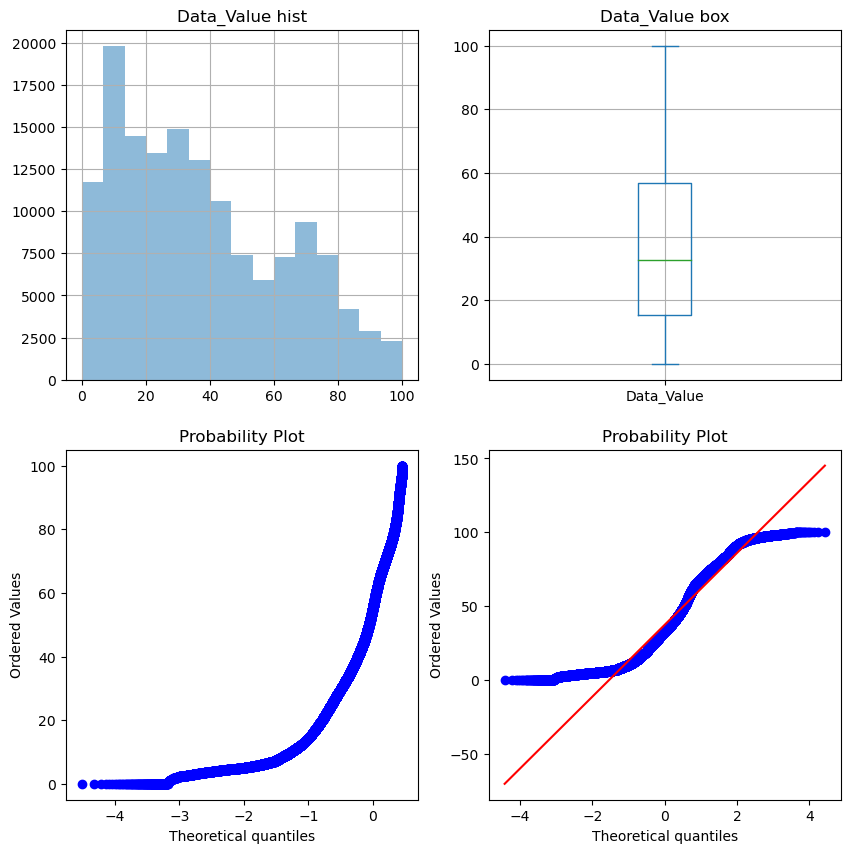

In [21]:
plt.figure(figsize = (10,10))

#直方图
plt.subplot(2,2,1)
plt.title("Data_Value hist")
data['Data_Value'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#盒图
plt.subplot(2,2,2)
plt.title("Data_Value box")
data['Data_Value'].plot(kind='box',grid=True)

#q-q图
plt.subplot(2,2,3)
stats.probplot(data['Data_Value'],dist="norm",plot=plt)

#去除缺失值再绘制q-q图
plt.subplot(2,2,4)
data_drop=pd.DataFrame(data['Data_Value'].copy(deep=True))
data_drop = data_drop.dropna()
stats.probplot(data_drop['Data_Value'], dist="norm", plot=plt)

plt.show()

（2）绘制Data_Value_Alt的直方图、盒图、q-q图

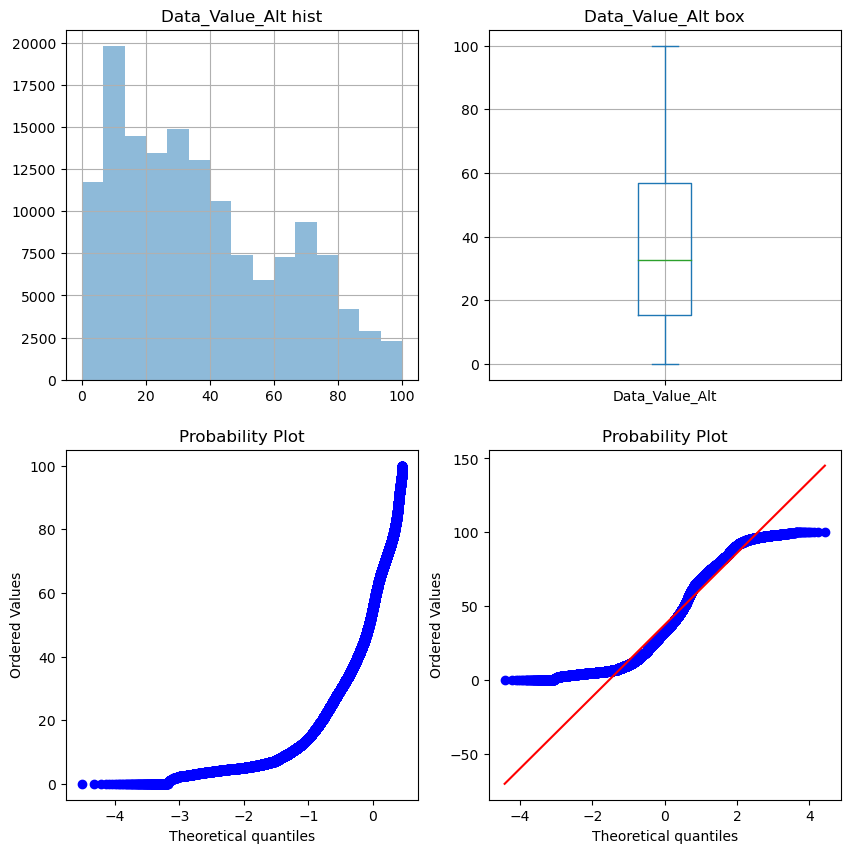

In [22]:
plt.figure(figsize = (10,10))

#直方图
plt.subplot(2,2,1)
plt.title("Data_Value_Alt hist")
data['Data_Value_Alt'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#盒图
plt.subplot(2,2,2)
plt.title("Data_Value_Alt box")
data['Data_Value_Alt'].plot(kind='box',grid=True)

#q-q图
plt.subplot(2,2,3)
stats.probplot(data['Data_Value_Alt'],dist="norm",plot=plt)

#去除缺失值再绘制q-q图
plt.subplot(2,2,4)
data_drop=pd.DataFrame(data['Data_Value_Alt'].copy(deep=True))
data_drop = data_drop.dropna()
stats.probplot(data_drop['Data_Value_Alt'], dist="norm", plot=plt)

plt.show()

（3）绘制Low_Confidence_Limit的直方图、盒图、q-q图

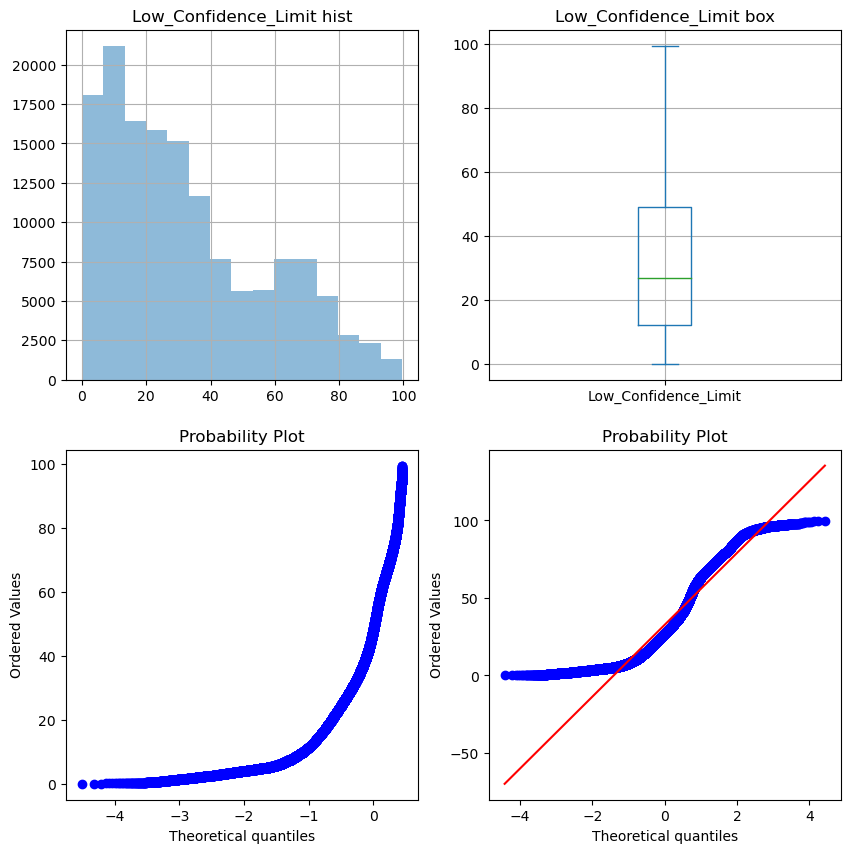

In [23]:
plt.figure(figsize = (10,10))

#直方图
plt.subplot(2,2,1)
plt.title("Low_Confidence_Limit hist")
data['Low_Confidence_Limit'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#盒图
plt.subplot(2,2,2)
plt.title("Low_Confidence_Limit box")
data['Low_Confidence_Limit'].plot(kind='box',grid=True)

#q-q图
plt.subplot(2,2,3)
stats.probplot(data['Low_Confidence_Limit'],dist="norm",plot=plt)

#去除缺失值再绘制q-q图
plt.subplot(2,2,4)
data_drop=pd.DataFrame(data['Low_Confidence_Limit'].copy(deep=True))
data_drop = data_drop.dropna()
stats.probplot(data_drop['Low_Confidence_Limit'], dist="norm", plot=plt)

plt.show()

（4）绘制High_Confidence_Limit的直方图、盒图、q-q图

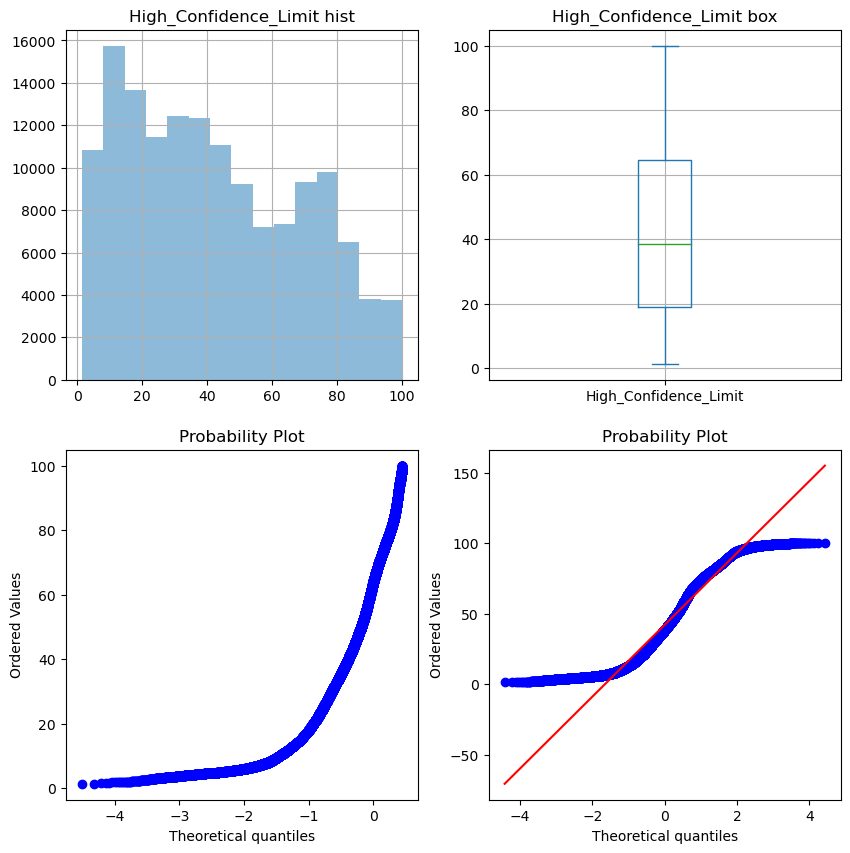

In [24]:
plt.figure(figsize = (10,10))

#直方图
plt.subplot(2,2,1)
plt.title("High_Confidence_Limit hist")
data['High_Confidence_Limit'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#盒图
plt.subplot(2,2,2)
plt.title("High_Confidence_Limit box")
data['High_Confidence_Limit'].plot(kind='box',grid=True)

#q-q图
plt.subplot(2,2,3)
stats.probplot(data['High_Confidence_Limit'],dist="norm",plot=plt)

#去除缺失值再绘制q-q图
plt.subplot(2,2,4)
data_drop=pd.DataFrame(data['High_Confidence_Limit'].copy(deep=True))
data_drop = data_drop.dropna()
stats.probplot(data_drop['High_Confidence_Limit'], dist="norm", plot=plt)

plt.show()

## 数据缺失处理

In [25]:
#绘制表格查看数据缺失值并检验四种方案填充后是否还有缺失值
def missing_data(datatodel):
    missing_num = datatodel.isnull().sum()
    missing_percent = missing_num/datatodel.shape[0]*100
    concat_data = pd.concat([missing_num,missing_percent],axis=1,keys=['missing_num','missing_percent'])
    concat_data['Types'] = datatodel.dtypes
    return concat_data

missing_data(data)

,missing_num,missing_percent,Types
YearStart,0,0.000000,int64
YearEnd,0,0.000000,int64
LocationAbbr,0,0.000000,object
LocationDesc,0,0.000000,object
Datasource,0,0.000000,object
Class,0,0.000000,object
Topic,0,0.000000,object
Question,0,0.000000,object
Data_Value_Unit,0,0.000000,object
DataValueTypeID,0,0.000000,object


由上表可以看出，数值属性Data_Value、Data_Value_Alt、Low_Confidence_Limit、High_Confidence_Limit、Sample_Size、Geolocation存在缺失值  
这里缺失的原因可能是由于未完全记录、遗漏或无法获取

标称属性StratificationCategory2、Stratification2存在缺失值  
由于可能不存在用于分层的第二类，因此以上两个属性存在正常缺失情况，无需进行缺失值处理

### 方案一 缺失值剔除

In [26]:
del_null_data = data.copy(deep=True)
del_null_data.pop('Sample_Size')
del_null_data = del_null_data.dropna()
#处理缺失数据后的数据展示
missing_data(del_null_data)

,missing_num,missing_percent,Types
YearStart,0,0.0,int64
YearEnd,0,0.0,int64
LocationAbbr,0,0.0,object
LocationDesc,0,0.0,object
Datasource,0,0.0,object
Class,0,0.0,object
Topic,0,0.0,object
Question,0,0.0,object
Data_Value_Unit,0,0.0,object
DataValueTypeID,0,0.0,object


+ 新旧数据集对比

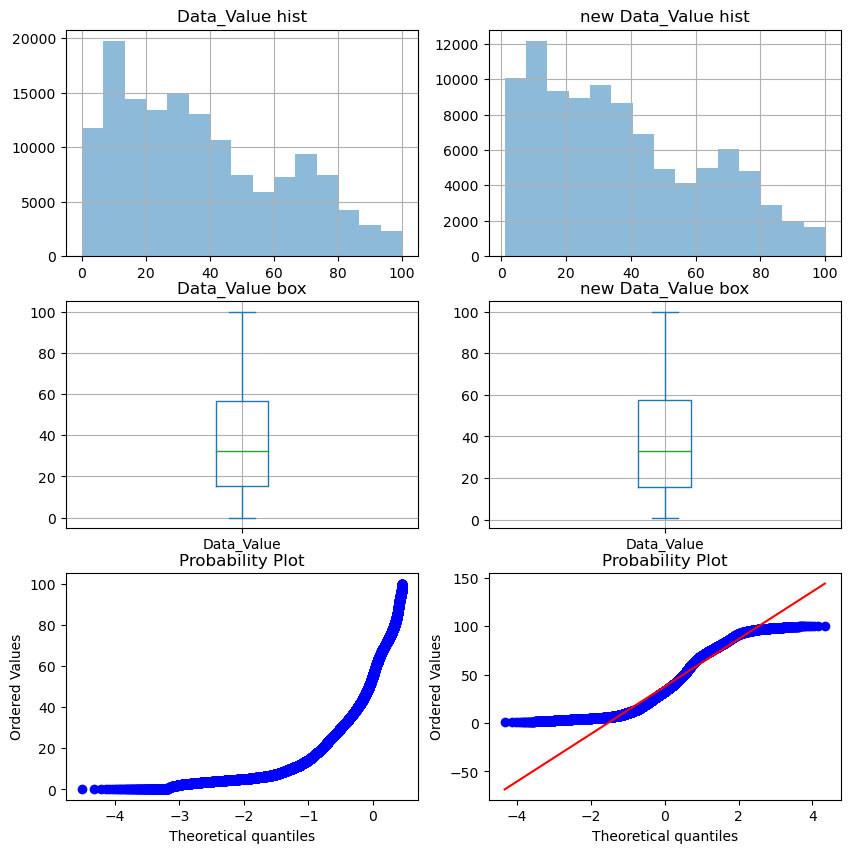

In [27]:
plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("Data_Value hist")
data['Data_Value'].hist(alpha=0.5,bins=15)

plt.subplot(3,2,2)
plt.title("new Data_Value hist")
del_null_data['Data_Value'].hist(alpha=0.5,bins=15)


#盒图
plt.subplot(3,2,3)
plt.title("Data_Value box")
data['Data_Value'].plot(kind='box',grid=True)

plt.subplot(3,2,4)
plt.title("new Data_Value box")
del_null_data['Data_Value'].plot(kind='box',grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['Data_Value'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(del_null_data['Data_Value'],dist="norm",plot=plt)

plt.show()

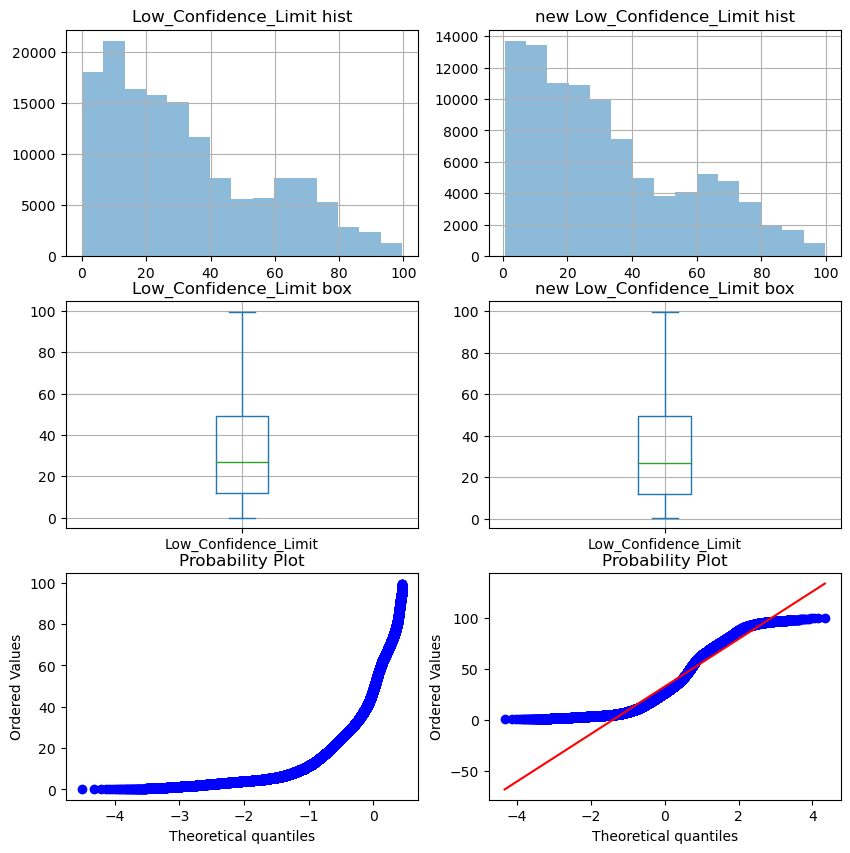

In [28]:
plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("Low_Confidence_Limit hist")
data['Low_Confidence_Limit'].hist(alpha=0.5,bins=15)

plt.subplot(3,2,2)
plt.title("new Low_Confidence_Limit hist")
del_null_data['Low_Confidence_Limit'].hist(alpha=0.5,bins=15)


#盒图
plt.subplot(3,2,3)
plt.title("Low_Confidence_Limit box")
data['Low_Confidence_Limit'].plot(kind='box',grid=True)

plt.subplot(3,2,4)
plt.title("new Low_Confidence_Limit box")
del_null_data['Low_Confidence_Limit'].plot(kind='box',grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['Low_Confidence_Limit'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(del_null_data['Low_Confidence_Limit'],dist="norm",plot=plt)

plt.show()

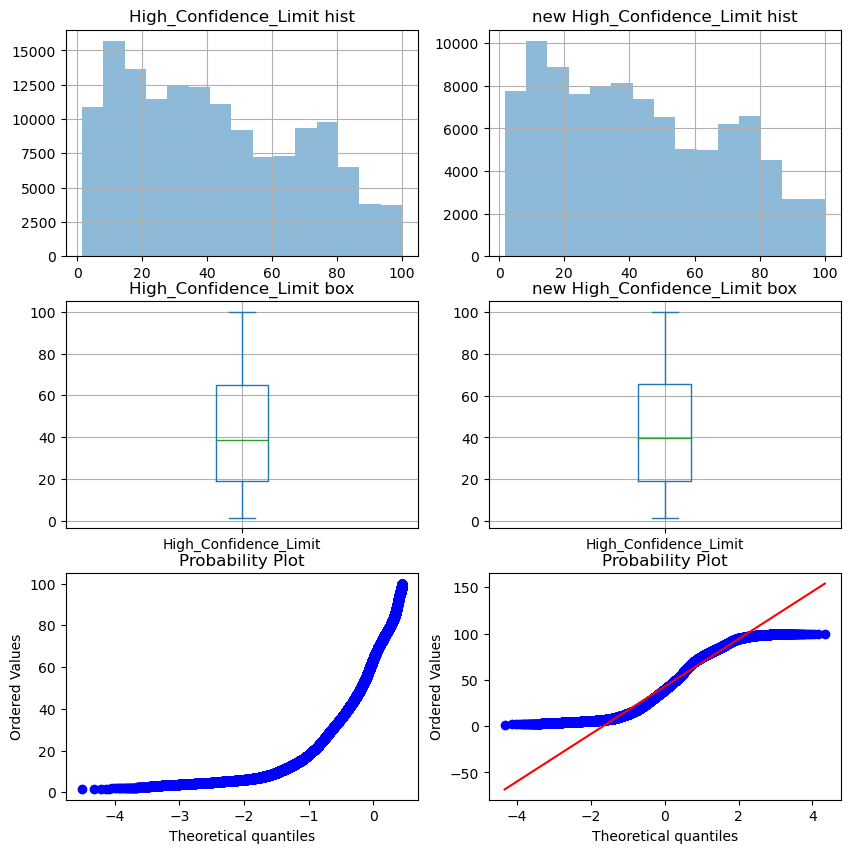

In [29]:
plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("High_Confidence_Limit hist")
data['High_Confidence_Limit'].hist(alpha=0.5,bins=15)

plt.subplot(3,2,2)
plt.title("new High_Confidence_Limit hist")
del_null_data['High_Confidence_Limit'].hist(alpha=0.5,bins=15)


#盒图
plt.subplot(3,2,3)
plt.title("High_Confidence_Limit box")
data['High_Confidence_Limit'].plot(kind='box',grid=True)

plt.subplot(3,2,4)
plt.title("new High_Confidence_Limit box")
del_null_data['High_Confidence_Limit'].plot(kind='box',grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['High_Confidence_Limit'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(del_null_data['High_Confidence_Limit'],dist="norm",plot=plt)

plt.show()

In [30]:
del_null_data[['Data_Value','Low_Confidence_Limit','High_Confidence_Limit']].describe()  #缺失部分剔除后数据的5数概况

,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
count,97238.000000,97238.000000,97238.000000
mean,37.663025,32.702959,42.807160
std,25.306987,24.236990,26.313108
min,1.000000,0.600000,1.700000
25%,15.500000,12.100000,19.400000
50%,32.900000,26.700000,39.500000
75%,57.400000,49.300000,65.300000
max,99.900000,99.600000,100.000000


### 方案二 用最高频率值来填补缺失值

In [31]:
#用最高频率来填补缺失值--此处使用深拷贝，否则会改变原值
fill_data_with_most_frequency = data.copy(deep=True)
#对'Data_Value'进行最高频率值填补缺失值
word_counts = Counter(fill_data_with_most_frequency['Data_Value'])
top = word_counts.most_common(1)[0][0]
fill_data_with_most_frequency['Data_Value'] = fill_data_with_most_frequency['Data_Value'].fillna(top)


#对'Low_Confidence_Limit'进行最高频率值填补缺失值
word_counts = Counter(fill_data_with_most_frequency['Low_Confidence_Limit'])
top = word_counts.most_common(1)[0][0]
fill_data_with_most_frequency['Low_Confidence_Limit'] = fill_data_with_most_frequency['Low_Confidence_Limit'].fillna(top)


#对'High_Confidence_Limit'进行最高频率值填补缺失值
word_counts = Counter(fill_data_with_most_frequency['High_Confidence_Limit'])
top = word_counts.most_common(1)[0][0]
fill_data_with_most_frequency['High_Confidence_Limit'] = fill_data_with_most_frequency['High_Confidence_Limit'].fillna(top)


+ 新旧数据集对比

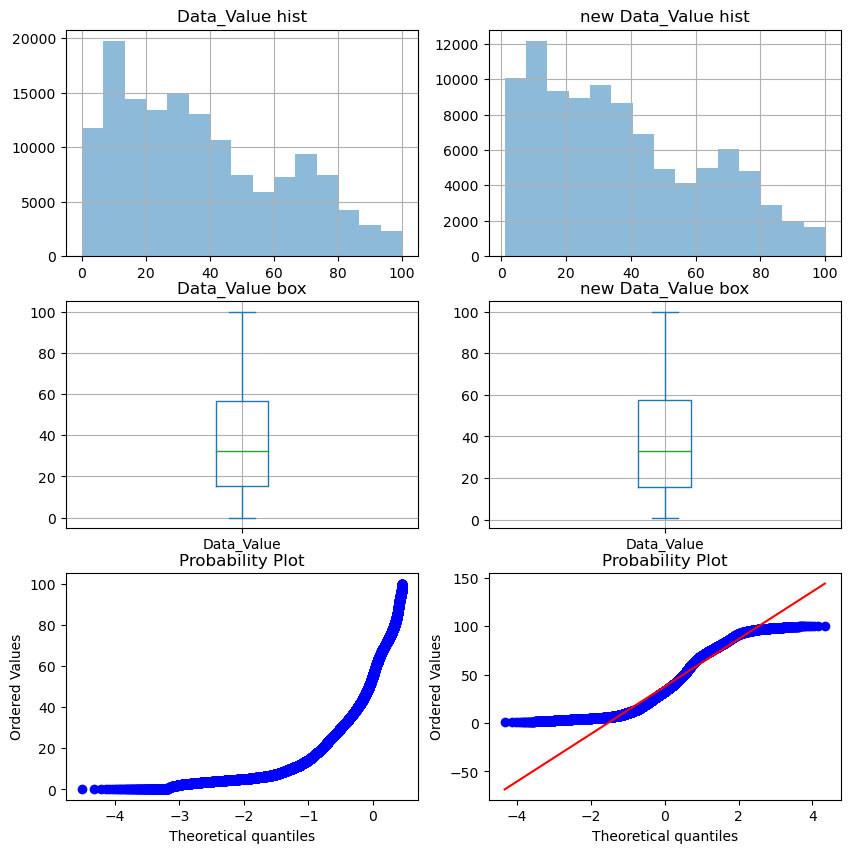

In [32]:
plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("Data_Value hist")
data['Data_Value'].hist(alpha=0.5,bins=15)

plt.subplot(3,2,2)
plt.title("new Data_Value hist")
del_null_data['Data_Value'].hist(alpha=0.5,bins=15)


#盒图
plt.subplot(3,2,3)
plt.title("Data_Value box")
data['Data_Value'].plot(kind='box',grid=True)

plt.subplot(3,2,4)
plt.title("new Data_Value box")
del_null_data['Data_Value'].plot(kind='box',grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['Data_Value'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(del_null_data['Data_Value'],dist="norm",plot=plt)

plt.show()

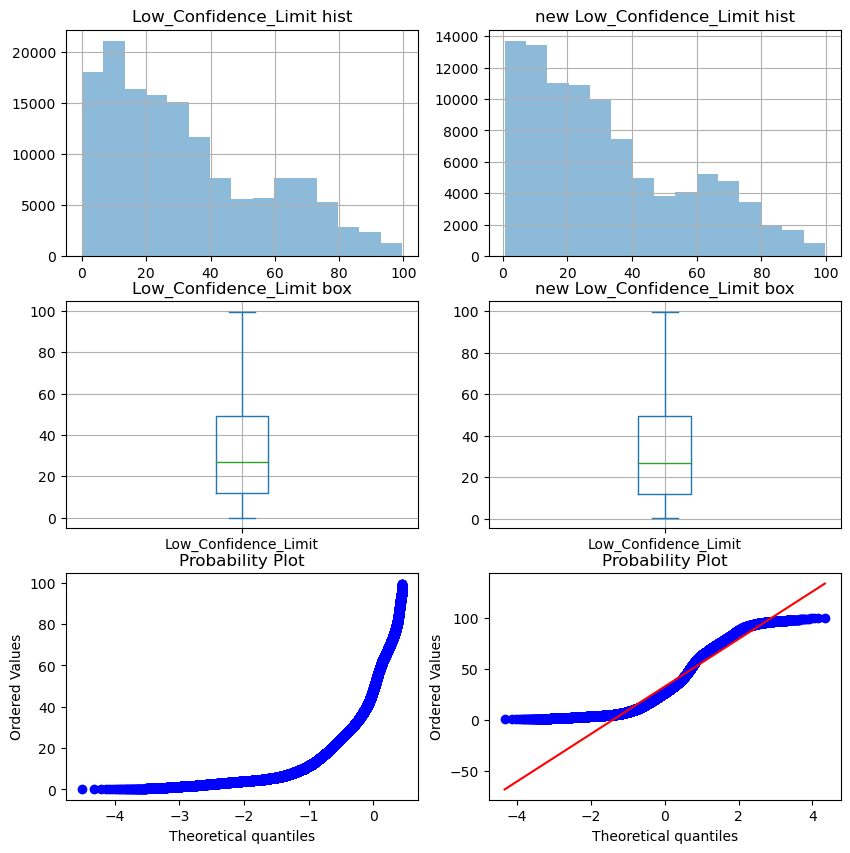

In [33]:
plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("Low_Confidence_Limit hist")
data['Low_Confidence_Limit'].hist(alpha=0.5,bins=15)

plt.subplot(3,2,2)
plt.title("new Low_Confidence_Limit hist")
del_null_data['Low_Confidence_Limit'].hist(alpha=0.5,bins=15)


#盒图
plt.subplot(3,2,3)
plt.title("Low_Confidence_Limit box")
data['Low_Confidence_Limit'].plot(kind='box',grid=True)

plt.subplot(3,2,4)
plt.title("new Low_Confidence_Limit box")
del_null_data['Low_Confidence_Limit'].plot(kind='box',grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['Low_Confidence_Limit'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(del_null_data['Low_Confidence_Limit'],dist="norm",plot=plt)

plt.show()

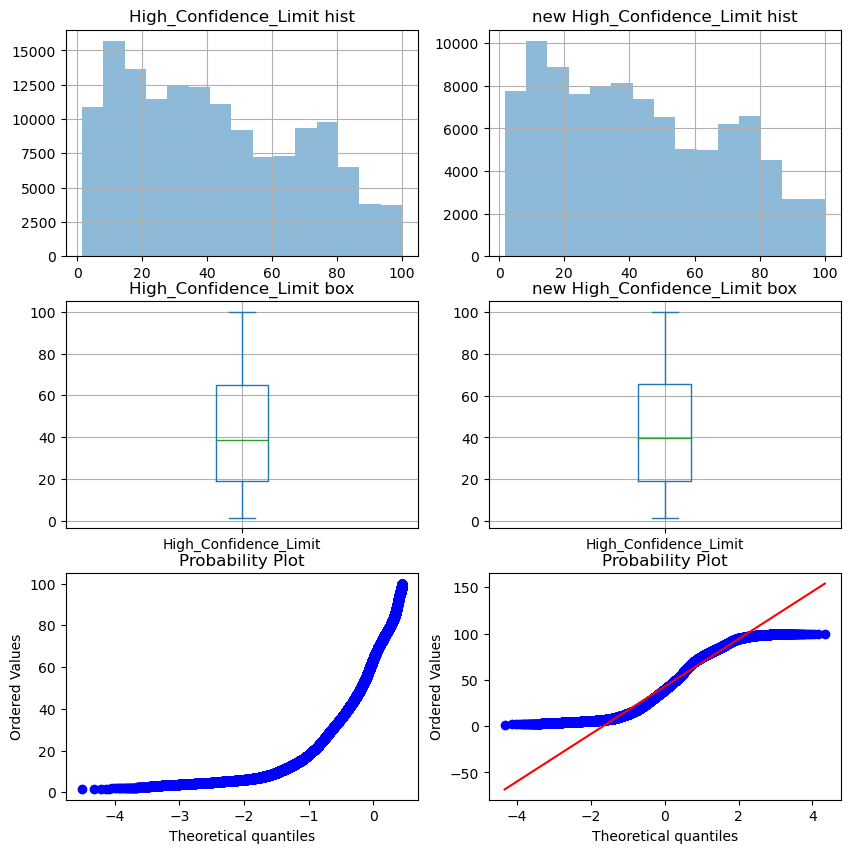

In [34]:
plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("High_Confidence_Limit hist")
data['High_Confidence_Limit'].hist(alpha=0.5,bins=15)

plt.subplot(3,2,2)
plt.title("new High_Confidence_Limit hist")
del_null_data['High_Confidence_Limit'].hist(alpha=0.5,bins=15)


#盒图
plt.subplot(3,2,3)
plt.title("High_Confidence_Limit box")
data['High_Confidence_Limit'].plot(kind='box',grid=True)

plt.subplot(3,2,4)
plt.title("new High_Confidence_Limit box")
del_null_data['High_Confidence_Limit'].plot(kind='box',grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['High_Confidence_Limit'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(del_null_data['High_Confidence_Limit'],dist="norm",plot=plt)

plt.show()

### 方案三 通过属性的相关关系来填补缺失值

In [35]:
#查看相关的属性关系
data.pop('Sample_Size')
data.corr()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID
YearStart,1.000000,0.808550,0.040190,0.040190,0.043679,0.035203,0.006805
YearEnd,0.808550,1.000000,0.010573,0.010573,0.002832,0.018413,0.003154
Data_Value,0.040190,0.010573,1.000000,1.000000,0.983967,0.983857,-0.012051
Data_Value_Alt,0.040190,0.010573,1.000000,1.000000,0.983967,0.983857,-0.012051
Low_Confidence_Limit,0.043679,0.002832,0.983967,0.983967,1.000000,0.939058,-0.024691
High_Confidence_Limit,0.035203,0.018413,0.983857,0.983857,0.939058,1.000000,0.011631
LocationID,0.006805,0.003154,-0.012051,-0.012051,-0.024691,0.011631,1.000000


In [36]:
#通过属性的相关关系来填补Data_Value缺失值
target_data = data['Data_Value'].copy(deep=True)
source_data = data['Low_Confidence_Limit'].copy(deep=True)

flag1 = target_data.isnull().values
flag2 = source_data.isnull().values

i=0
for _,value in target_data.iteritems():
    if(flag1[i]==True) and (flag2[i]==False):
        target_data[i] = 5 + source_data[i]
    i=i+1

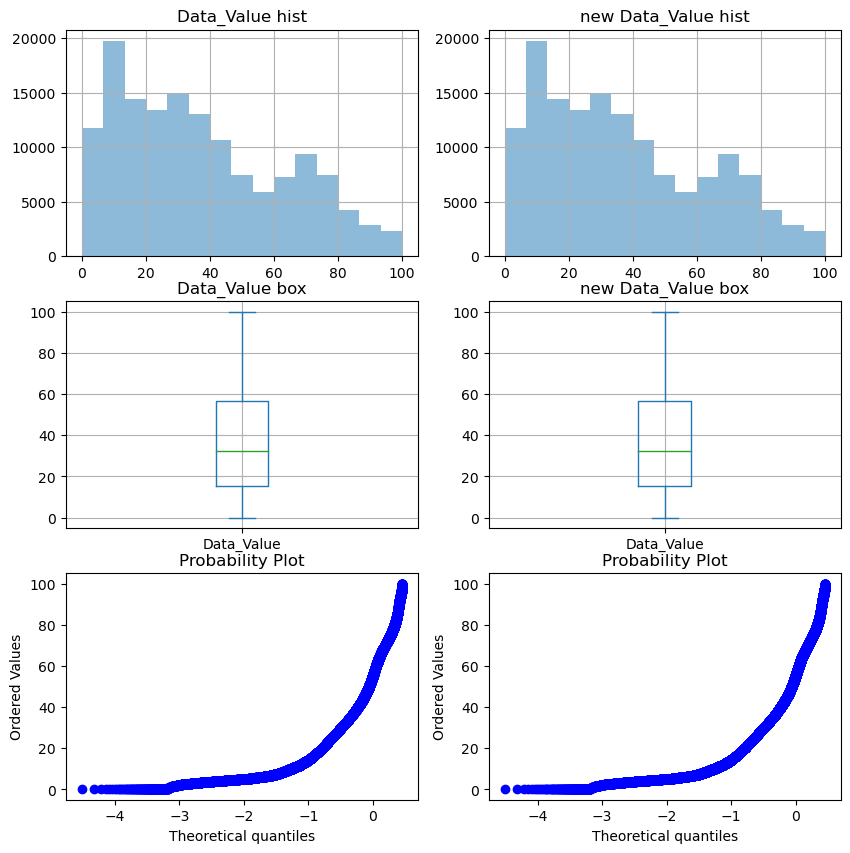

In [37]:
#Data_Value 可视化对比新旧数据

plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("Data_Value hist")
data['Data_Value'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#直方图
plt.subplot(3,2,2)
plt.title("new Data_Value hist")
target_data.hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数


#盒图
plt.subplot(3,2,3)
plt.title("Data_Value box")
data['Data_Value'].plot(kind='box',grid=True)

#盒图
plt.subplot(3,2,4)
plt.title("new Data_Value box")
target_data.plot(kind='box',grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['Data_Value'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(target_data,dist="norm",plot=plt)

plt.show()

In [38]:
#补充后的Data_Value数据描述
target_data.describe()

count    144629.000000
mean         37.341956
std          25.183017
min           0.000000
25%          15.300000
50%          32.500000
75%          56.800000
max         100.000000
Name: Data_Value, dtype: float64

In [39]:
#通过属性的相关关系来填补Low_Confidence_Limit缺失值
target_data = data['Low_Confidence_Limit'].copy(deep=True)
source_data = data['Data_Value'].copy(deep=True)

flag1 = target_data.isnull().values
flag2 = source_data.isnull().values

i=0
for _,value in target_data.iteritems():
    if(flag1[i]==True) and (flag2[i]==False):
        target_data[i] = source_data[i] - 5
        target_data[i]=max(target_data[i],0)
    i=i+1

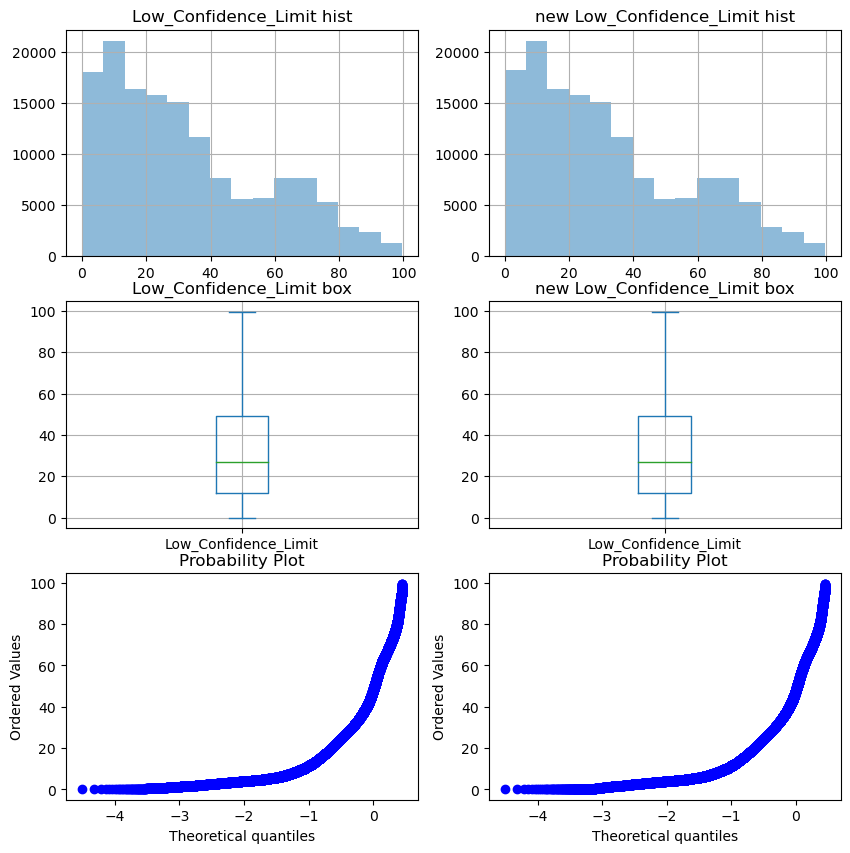

In [40]:
#Low_Confidence_Limit 可视化对比新旧数据

plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("Low_Confidence_Limit hist")
data['Low_Confidence_Limit'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#直方图
plt.subplot(3,2,2)
plt.title("new Low_Confidence_Limit hist")
target_data.hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数


#盒图
plt.subplot(3,2,3)
plt.title("Low_Confidence_Limit box")
data['Low_Confidence_Limit'].plot(kind='box',grid=True)

#盒图
plt.subplot(3,2,4)
plt.title("new Low_Confidence_Limit box")
target_data.plot(kind='box',grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['Low_Confidence_Limit'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(target_data,dist="norm",plot=plt)

plt.show()

In [41]:
#补充后的Low_Confidence_Limit数据描述
target_data.describe()

count    144629.000000
mean         32.709428
std          24.251515
min           0.000000
25%          12.000000
50%          26.800000
75%          49.100000
max          99.600000
Name: Low_Confidence_Limit, dtype: float64

### 方案四 通过数据对象之间的相似性来填补缺失值

In [42]:
numeric_attr = ['Data_Value','Low_Confidence_Limit']
#查找两个对象间的相似性
#如果通过暴力法求解耗时耗力
#所以选择通过二分法查找的方法进行相似性选择

def find_dis_value(dataset, pos, numeric_attr):
    def dis_objs(tar_obj_index, sou_obj_index):
        tar_obj = dataset.iloc[tar_obj_index]
        sou_obj = dataset.iloc[sou_obj_index]
        dis_value = 0
        for column in tar_obj.index:
            if column == 'Low_Confidence_Limit':
                if (not math.isnan(tar_obj[column])) and (not math.isnan(sou_obj[column])):                 
                    dis_value += sou_obj[column] - tar_obj[column]                
                else:
                    dis_value += 9998
        return dis_value

    
    mindis = 9999
    result_pos = -1
    leftindex = 0;
    rightindex = dataset.shape[0]-1
    #二分查找返回最近距离的一个result_pos
    while leftindex<=rightindex:
        midindex = int((leftindex+rightindex)/2)
        tmpdis = dis_objs(pos,midindex)        
        if(tmpdis>0):
            rightindex = midindex-1            
        elif(tmpdis == 0):
            result_pos = midindex
            break;
        else:
            leftindex = midindex+1        
        if(tmpdis<mindis):
            result_pos = midindex  
    return result_pos




# 通过数据对象之间的相似性来填补Data_Value缺失值
numical_datasets = pd.DataFrame(data[numeric_attr].copy(deep=True))

#对numical_datasets排序
numical_datasets.sort_values("Low_Confidence_Limit",inplace=True)
data_new = numical_datasets['Data_Value'].copy(deep=True)

print('空数据数量为:',data_new.isnull().sum())
length = numical_datasets.shape[0]
count=1;
for i in range(length):
    if math.isnan(numical_datasets['Data_Value'].iloc[i]):       
#         print('当前处理第'+str(count)+"个")
#         print(i,numical_datasets.iloc[i])  
        result_pos = find_dis_value(numical_datasets, i, numeric_attr)
#         print(result_pos,numical_datasets.iloc[result_pos])
        data_new.iloc[i] = data_new.iloc[result_pos]
#         print(i,data_area_id.iloc[i])
        count+=1
    
#填充后的空数据数量
print('填充后的空数据数量为:',data_new.isnull().sum())

空数据数量为: 69833
填充后的空数据数量为: 0


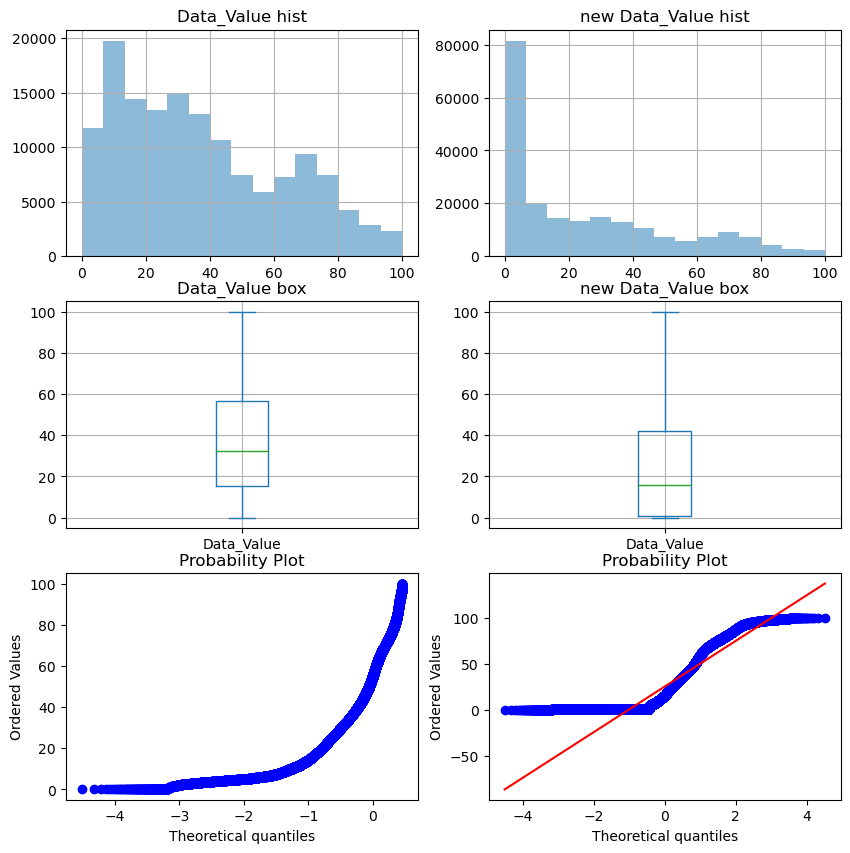

In [43]:
#Data_Value可视化对比新旧数据

plt.figure(figsize = (10,10))

#直方图
plt.subplot(3,2,1)
plt.title("Data_Value hist")
data['Data_Value'].hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数

#直方图
plt.subplot(3,2,2)
plt.title("new Data_Value hist")
data_new.hist(alpha=0.5,bins=15) #alpha透明度，bins竖条数


#盒图
plt.subplot(3,2,3)
plt.title("Data_Value box")
data['Data_Value'].plot(kind='box',grid=True)

#盒图
plt.subplot(3,2,4)
plt.title("new Data_Value box")
data_new.plot(kind='box',grid=True)

#q-q图
plt.subplot(3,2,5)
stats.probplot(data['Data_Value'],dist="norm",plot=plt)

plt.subplot(3,2,6)
stats.probplot(data_new,dist="norm",plot=plt)

plt.show()

In [44]:
#Data_Value的数据描述
data_new.describe()  # #通过数据对象之间的相似性来填补后数据的5数概况

count    214462.000000
mean         25.410622
std          26.879596
min           0.000000
25%           0.700000
50%          15.900000
75%          42.100000
max         100.000000
Name: Data_Value, dtype: float64